## Phase One: let's do some coding!!
### In this notebook, we'd like to make our plots show up as we code them, so we tell the python plotting package, matplotlib, to plot 'inline'. We will also use numpy, which is short for 'numerical python'. Numpy is useful when using trigonometric functions like sin and cos.

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## Last time we wrote a function that used Kepler's Third Law to solve for the orbital period when given the semimajor axis. This time, we'll use Kepler's Third Law to solve for the semimajor axis when given the orbital period. Remember a few things about functions: 
### (1) the function is named something useful, so you know what it will do
### (2) the function needs variables (the things inside the parentheses) to begin and returns variables at the end
### (3) the function should tell you what the physical units are for each variable
## We'll use these functions to generate orbits for several different scenarios. The first functions uses Kepler's third law to convert between semimajor axis and orbital period. The second function solves for every point on an orbit; this can be used to graph the orbit!

In [2]:
def keplerIII_period_to_semimajor_axis(orbital_period):
    #########################################################
    # Units: orbital period [yr], separation [au]           #
    #########################################################
    semimajor_axis_cubed = orbital_period**2
    semimajor_axis = semimajor_axis_cubed**(1./3.)
    
    return semimajor_axis

def make_kepler_orbit(eccentricity,orbital_period):
    ##########################################################
    # Units: orbital period [years]                          #
    # returns: 500 true anomaly values throughout the orbit  #
    ##########################################################
    nStep = 500
    tRange = np.linspace(0.0,orbital_period,nStep)
    
    theta = []    
    for time in tRange:
        PsiDiff = 1.0
        M = 2*np.pi*time/orbital_period
        PsiOld = M
        theta0old = 180.0
        while PsiDiff > 1e-10:
            PsiNew = M + eccentricity*np.sin(PsiOld)
            PsiDiff = PsiNew-PsiOld
            PsiOld = PsiNew
        theta0 = 2*np.arctan(((1+eccentricity)/(1-eccentricity))**(0.5)*np.tan(PsiOld/2.))
        theta.append(theta0)        
    return theta

## First, let's simulate the Earth's orbit! To do this, we need to specify all of the variables used in the 'make_kepler_orbit' function. Taking note of the units, let's fill in the orbital period and eccentricity of the Earth.

In [3]:
orbital_period = 1.0
eccentricity = 0.02

## Now we are ready to make our Kepler orbit. To do this, we need to send the right variables to the function and be ready for the variable the function sends back. make_kepler_orbit sends back a list of angles; these angles are different true anomaly angles for each time in the orbit.

## We need to be sure to name the list that gets sent back from make_kepler_orbit makes sense. Replace 'list1' with a name that makes sense to you.

In [4]:
list1 = make_kepler_orbit(eccentricity,orbital_period)


## To make plots, we need to be able to specify the x and y position of each true anomaly value. This is done using the kepler shape equation: 
<img src="shape_equation.gif">

## In the shape equation, theta is the true_anomaly.

## The function below, orbit(semimajor_axis,e,true_anomaly), computes the x and y values from the shape equation and returns them as xorbit and yorbit. We can use these x and y values to make a scatter plot of the orbit!

In [5]:
def orbit(semimajor_axis,eccentricity,true_anomaly): 
    ##############################################
    # Units: separation [au] #
    ##############################################
    
    # define the shape equation
    r_orbit = semimajor_axis*(1 - eccentricity**2)/(1 + eccentricity*np.cos(true_anomaly))
    x_orbit = r_orbit*np.cos(true_anomaly)
    y_orbit = r_orbit*np.sin(true_anomaly)
     
    
    return x_orbit,y_orbit

## Notice that the orbit function needs the semimajor axis. This means we'll need to use the Kepler's third law function to convert the orbital period to separation.

## What do we need to give the function to compute the semimajor axis?

In [7]:
semimajor_axis = keplerIII_period_to_semimajor_axis(orbital_period)

## Now that we have the separation, we can call the orbit function. The orbit function needs the separation, eccentricity and true anomaly to run. Remember that the true anomaly is returned by the make_kepler_orbit function. 

In [8]:
xOrbit, yOrbit = orbit(semimajor_axis,eccentricity,list1)


## Thanks to the orbit function, we can now plot our x_orbit and y_orbit values. In this plot, we put the Sun at the center (0,0).

## Notice that we set: plt.axis('equal') on the fifth line; this makes the plot use the same size for the x and y axes. Try commenting out the line that makes the axes equal by typing a '#' sign on the front part of the line. What happens to the orbit of the Earth? Why is this misleading? Fill in your answer in the box below the graph.

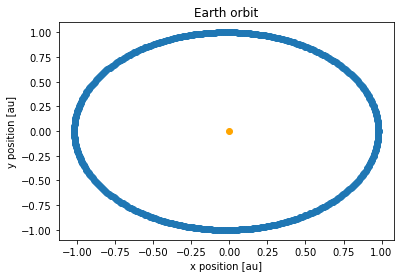

In [9]:
plt.title('Earth orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit,yOrbit)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()

The plot is misleading because: 




## Now that we know how to make Earth's orbit, we can make orbits for any of the planets in the Solar System on a single plot! We'll need to know the planet's orbital period in years and its eccentricity. This data is below for every planet other than Earth:

#### Planet = Mercury, orbital period = 0.48 years, eccentricity = 0.21
#### Planet = Venus, orbital period = 0.62 years, eccentricity = 0.01
#### Planet = Mars, orbital period = 1.88 years, eccentricity = 0.09
#### Planet = Jupiter, orbital period = 11.86 years, eccentricity = 0.05
#### Planet = Saturn, orbital period = 29.46 years, eccentricity = 0.05
#### Planet = Uranus, orbital period = 84.02 years, eccentricity = 0.05
#### Planet = Neptune, orbital period = 164.8 years, eccentricity = 0.01
#### Planet = Pluto, orbital period = 248.0 years, eccentricity = 0.25

### Based on the data above, predict which planet will have the most circular orbit and the least circular orbit. Fill in your answers below

planets with most circular orbits:

planets with least circular orbits:

### Following the method in the next cell, pick your favorite planet to plot and plot them in the empty cells below. 

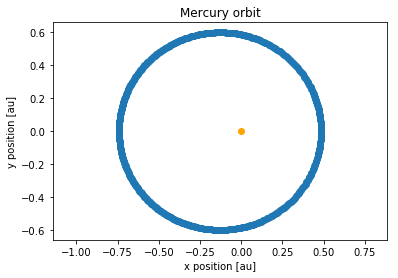

In [10]:
# Define Mercury's parameters; 
orbital_period_Mercury = 0.48
eccentricity_Mercury = 0.21

# compute Mercury's true anomaly
true_anomaly_Mercury = make_kepler_orbit(eccentricity_Mercury,orbital_period_Mercury)
                                         
# compute Mercury's separation
semimajor_axis_Mercury = keplerIII_period_to_semimajor_axis(orbital_period_Mercury)

# compute Mercury's x and y orbital coordinates
xOrbit_Mercury, yOrbit_Mercury = orbit(semimajor_axis_Mercury,eccentricity_Mercury,
                                       true_anomaly_Mercury)

plt.title('Mercury orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit_Mercury,yOrbit_Mercury)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()


In [11]:
##### PUT YOUR CODE IN HERE #####




# Phase Two

## Now let's try comparing the solar system planets to planets orbiting other stars, called exoplanets. Since Kepler's laws work for ANY orbit, we can use the same code to make plots for any kind of exoplanet. One kind of exoplanet is called a hot Jupiter. Below is an artist picture of Wasp 18b:

<img src="Wasp-18.jpg">

## Here is Wasp 18b's data:
#### Planet = Wasp-18b, orbital period = 0.24 years, eccentricity = 0.01

#### Planet = Jupiter, orbital period = 11.86 years, eccentricity = 0.05


## Based on the data, how would you compare Wasp 18b to Jupiter? Fill your answer in the cell below


How does Wasp-18b's eccentricity compare to Jupiter's eccentricity:

How does Wasp-18b's orbital period compare to Jupiter's orbital period:

## Now make a plot of Wasp 18b's orbit and Jupiter's orbit using the same methods as before. Be sure to include a title and axis labels!

## How is the shape of Wasp 18b similar to Jupiter? How is it different? 

Wasp 18b is similar to Jupiter because:

Wasp 18b is different from Jupiter because:

## Why do you think astronomers named planets like Wasp 18b 'Hot Jupiters'? Provide evidence (your reasoning) for this statement. 

Astronomer named planets like Wasp 18b 'Hot Jupiters' because: 